###### download the Data from :https://www.kaggle.com/uciml/iris?select=Iris.csv

#### Laoding and preparing the Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [4]:
iris_data = pd.read_csv('iris.csv',
                       skiprows = 1,
                       names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# shufle the dataframe 
iris_data = iris_data.sample(frac=1).reset_index(drop=True)
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.7,3.2,1.3,0.2,Iris-setosa
1,5.5,2.4,3.8,1.1,Iris-versicolor
2,4.8,3.4,1.6,0.2,Iris-setosa
3,5.1,2.5,3.0,1.1,Iris-versicolor
4,7.7,2.6,6.9,2.3,Iris-virginica


In [9]:
#shape property 
iris_data.shape

(150, 5)

###### 150 records and each records has 5 columns, 4 feature 1 class label 

In [10]:
#the labels present in our dataset 
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# we have categorical data we convert to numeric form

from sklearn import preprocessing 
label_encod = preprocessing.LabelEncoder()
iris_data['class'] = label_encod.fit_transform(iris_data['class'].astype(str))
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.7,3.2,1.3,0.2,0
1,5.5,2.4,3.8,1.1,1
2,4.8,3.4,1.6,0.2,0
3,5.1,2.5,3.0,1.1,1
4,7.7,2.6,6.9,2.3,2


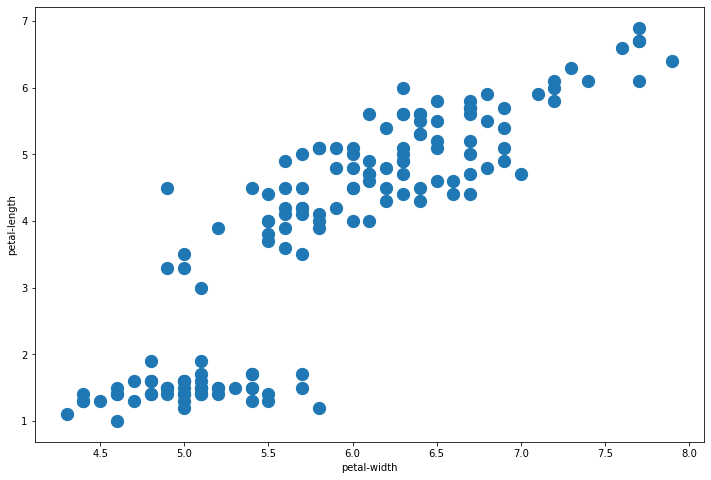

In [40]:
### plotting the petal width versus the petal length 
fig, ax =plt.subplots(figsize=(12,8))
plt.scatter(iris_data['sepal-length'], iris_data['petal-length'], s=150)
plt.xlabel('petal-width')
plt.ylabel('petal-length')
plt.show()

#### 1st : performing clustering with two features 

In [21]:
# we use two features sepal-length and petal-length 
iris_2D = iris_data[['sepal-length','petal-length']]
iris_2D.sample(5)


,sepal-length,petal-length
21,4.9,1.4
41,5.6,4.5
128,5.5,1.4
129,6.3,4.4
54,7.6,6.6


In [22]:
iris_2D.shape

(150, 2)

In [23]:
# convert to a numpy array before feeding to Kmean estimator
iris_2D = np.array(iris_2D)

In [28]:
# building the kmean estimator 
# we set n_cluster = 3 cause we know we have 3 clusters 
model_2D = KMeans(n_clusters = 3, max_iter = 1000).fit(iris_2D)

In [31]:
model_2D.labels_

# The labels assigned by K-means may not match the actual labels in our data
# these labels just represent clusters 

array([1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0])

In [34]:
# we display cordiante of our centroids set up by the KMeans model

centroids_2D = model_2D.cluster_centers_
centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

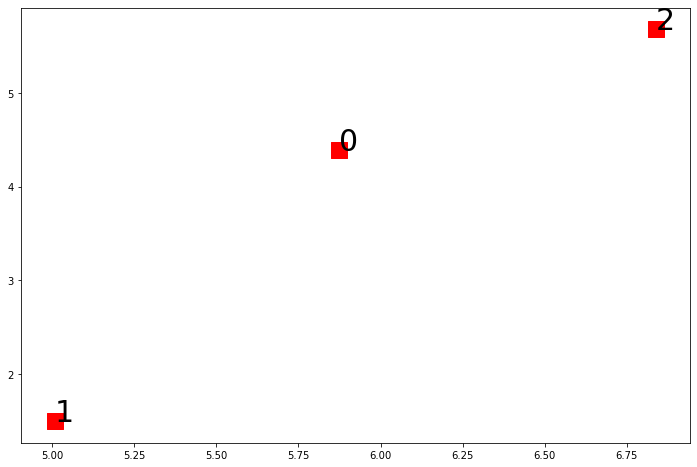

In [35]:
# visualizing the centroids 

fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c ='r', s=250, marker ='s')
for i in range (len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0],centroids_2D[i][1],), fontsize = 30)

In [37]:
labels = iris_data['class']

In [38]:
# evaluating 
print("Homogeneity_score:", metrics.homogeneity_score(labels,model_2D.labels_))

print("Completeness_score:", metrics.completeness_score(labels,model_2D.labels_))

print("V_measure_score:", metrics.v_measure_score(labels,model_2D.labels_))

print("Adjusted_rand_score:", metrics.adjusted_rand_score(labels,model_2D.labels_))

print("Adjusted_mutual_info_score:", metrics.adjusted_mutual_info_score(labels,model_2D.labels_))


Homogeneity_score: 0.7033177646052958
Completeness_score: 0.7096993707802843
V_measure_score: 0.706494157075837
Adjusted_rand_score: 0.6988627672348092
Adjusted_mutual_info_score: 0.702802453140913


##### using 2 features all the scores hover around 0.70

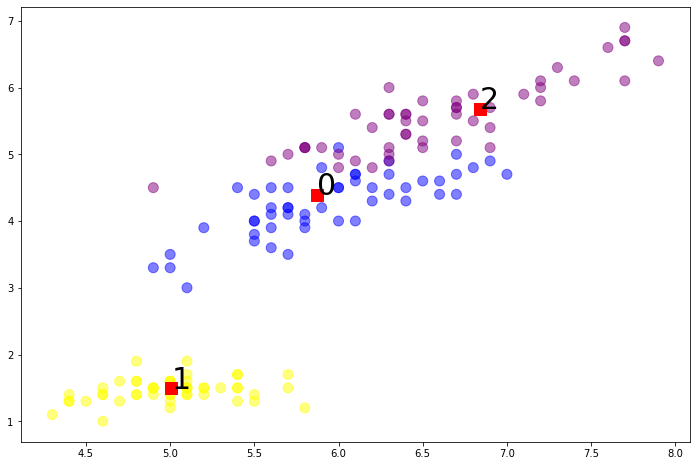

In [39]:
# visualizing the 3 clusters with the centroids generated by kmeans algorythmes
colors = ['yellow','blue','purple']
plt.figure(figsize=(12,8))

plt.scatter(iris_data['sepal-length'],iris_data['petal-length'], c=iris_data['class'], s=100, cmap=matplotlib.colors.ListedColormap(colors), alpha =0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c ='r', s =150, marker ='s')

for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0],centroids_2D[i][1]), fontsize = 30)

##### using all the features for clustering 

In [41]:
# select features (all) and the label 
iris_features = iris_data.drop('class', axis =1)
iris_labels = iris_data['class']

In [45]:
iris_features.sample(5)

,sepal-length,sepal-width,petal-length,petal-width
66,5.5,2.6,4.4,1.2
57,5.0,3.4,1.5,0.2
118,5.7,3.8,1.7,0.3
111,5.7,2.8,4.1,1.3
147,6.4,2.8,5.6,2.2


In [44]:
iris_labels.sample(5)

6     1
82    2
68    1
56    0
79    1
Name: class, dtype: int32

In [46]:
# instantiate Kmeans clustering estimator and call fit on all features 
model = KMeans(n_clusters = 3).fit(iris_features)

In [47]:
model.labels_

array([1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0])

In [49]:
# cordinates of the centroids
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [52]:
# evaluating 
print("Homogeneity_score:", metrics.homogeneity_score(iris_labels,model.labels_))
print("Completeness_score:", metrics.completeness_score(iris_labels,model.labels_))
print("V_measure_score:", metrics.v_measure_score(iris_labels,model.labels_))
print("Adjusted_rand_score:", metrics.adjusted_rand_score(iris_labels,model_2D.labels_))
print("Adjusted_mutual_info_score:", metrics.adjusted_mutual_info_score(iris_labels,model.labels_))


Homogeneity_score: 0.7514854021988339
Completeness_score: 0.7649861514489816
V_measure_score: 0.7581756800057786
Adjusted_rand_score: 0.6988627672348092
Adjusted_mutual_info_score: 0.7551191675800484


##### using the 4 features we see the clusetring has improved scores around 0.75